# Practice Project 1 - World Happiness Report

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings
warnings.filterwarnings('ignore')

In [97]:
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [99]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

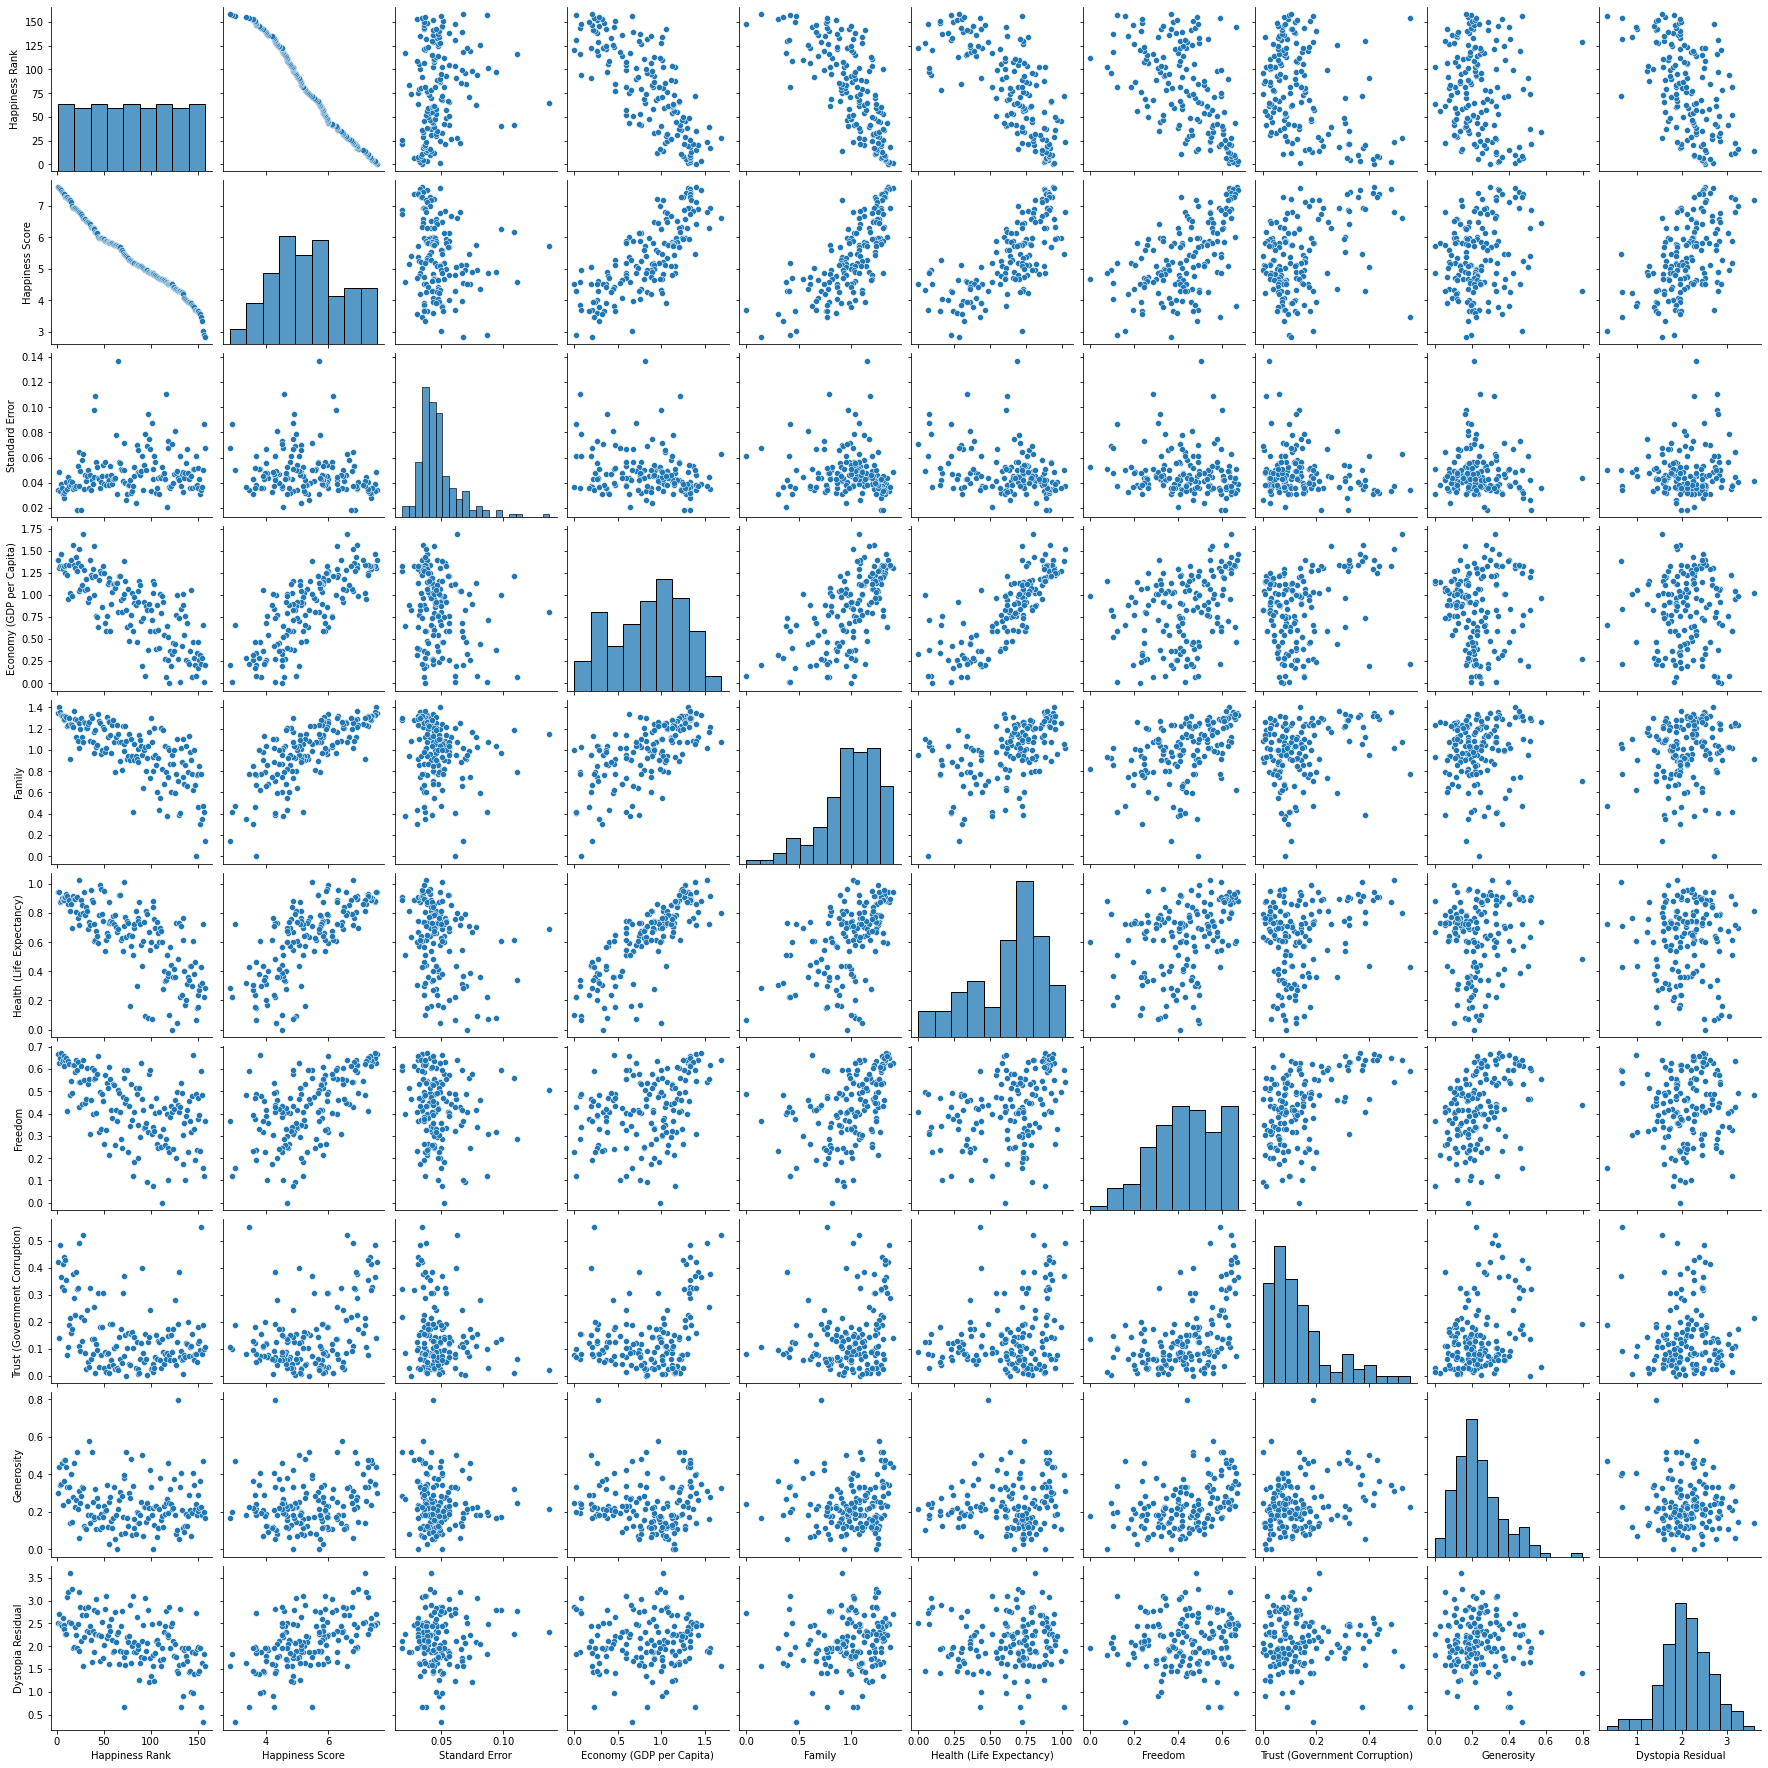

In [100]:
sns.pairplot(df)

In [101]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [102]:
lab_enc = LabelEncoder()
df['Country']= lab_enc.fit_transform(df['Country'])
df['Region']= lab_enc.fit_transform(df['Region'])

In [103]:
df['Country']

0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Name: Country, Length: 158, dtype: int32

In [104]:
df['Region']

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Name: Region, Length: 158, dtype: int32

In [105]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [106]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

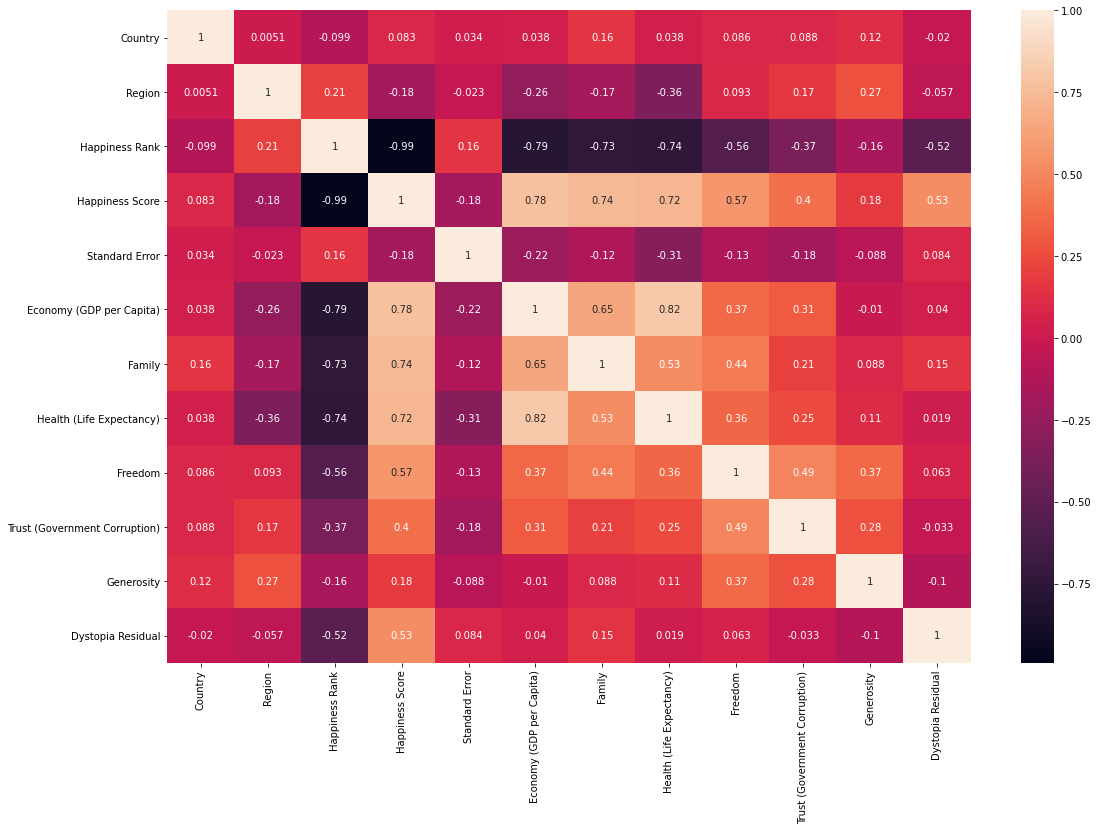

In [107]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(),annot=True)

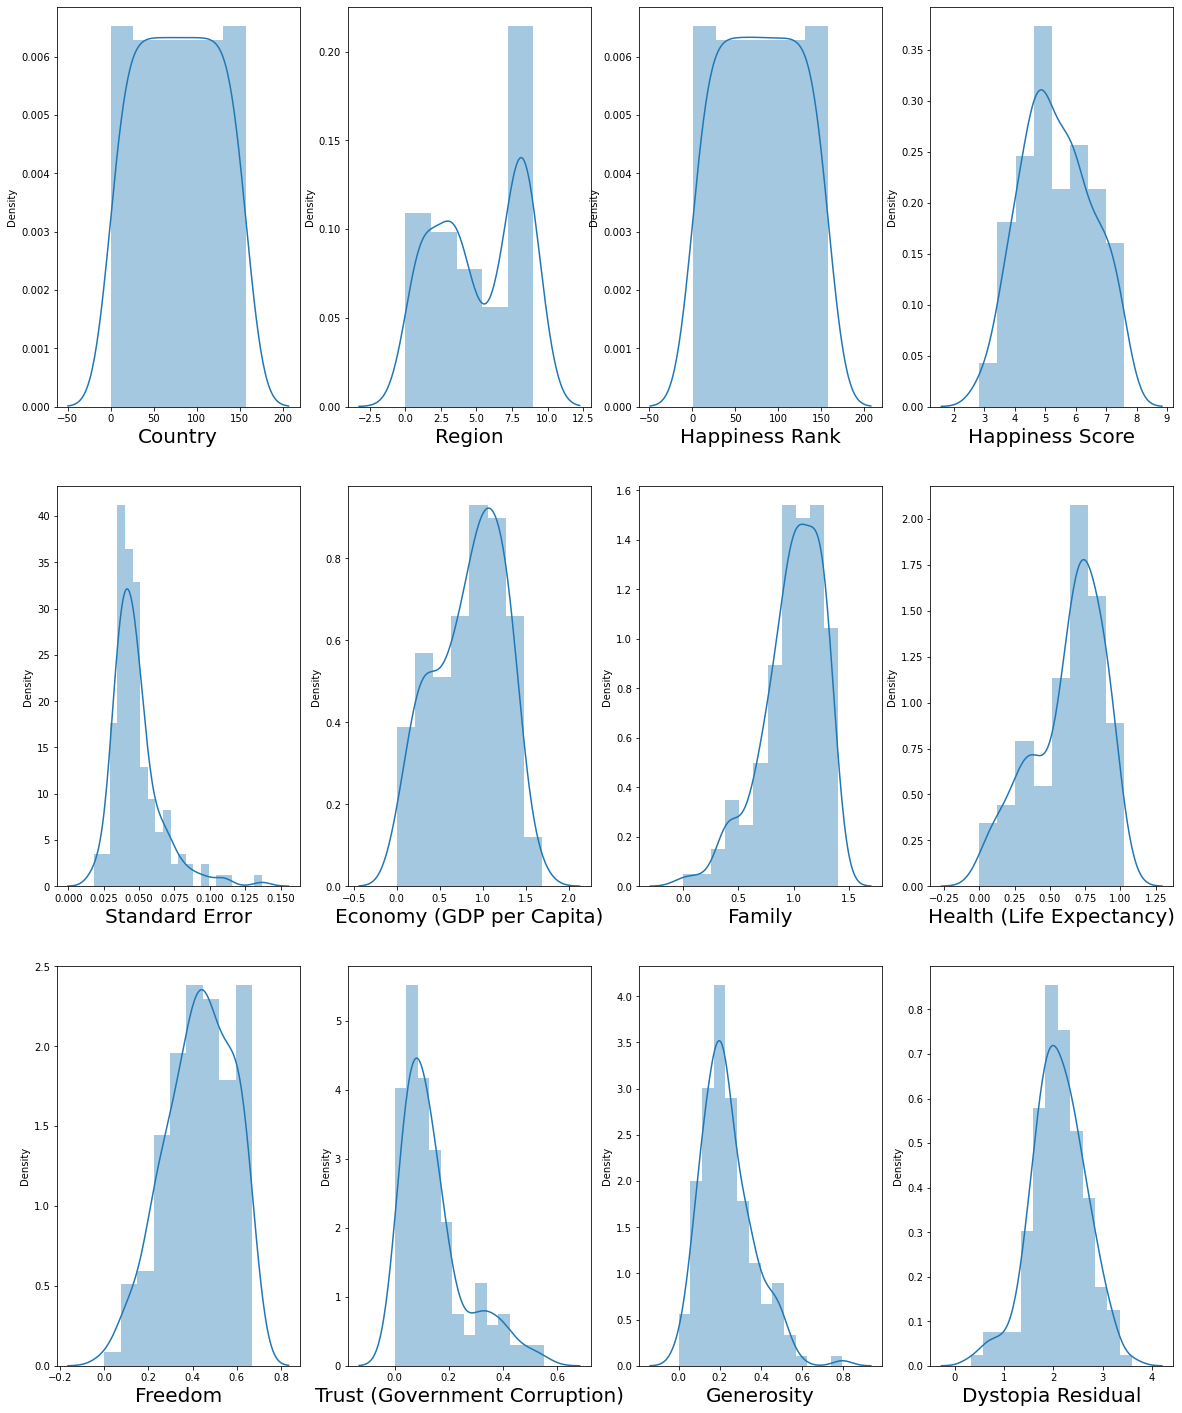

In [108]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel (column, fontsize=20)
        
    plotnumber+=1
plt.show()

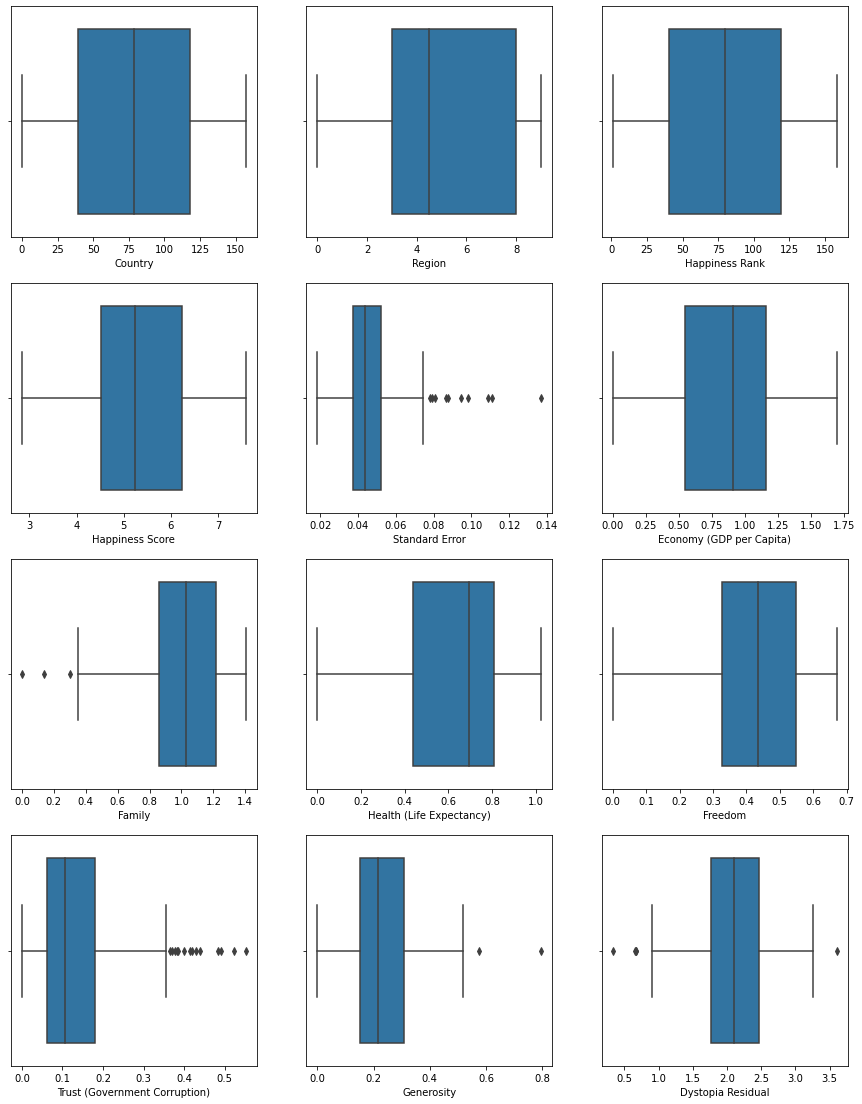

In [109]:
plt.figure(figsize=(15,50))
graph = 1

for column in df:
    if graph<=30:
        ax = plt.subplot(10,3, graph)
        sns.boxplot(df[column], orient='v')
        plt.xlabel (column, fontsize=10)
    graph+=1
plt.show()

In [110]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [111]:
df = df.drop(columns = ['Country','Region','Happiness Rank','Standard Error'],axis=1)
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


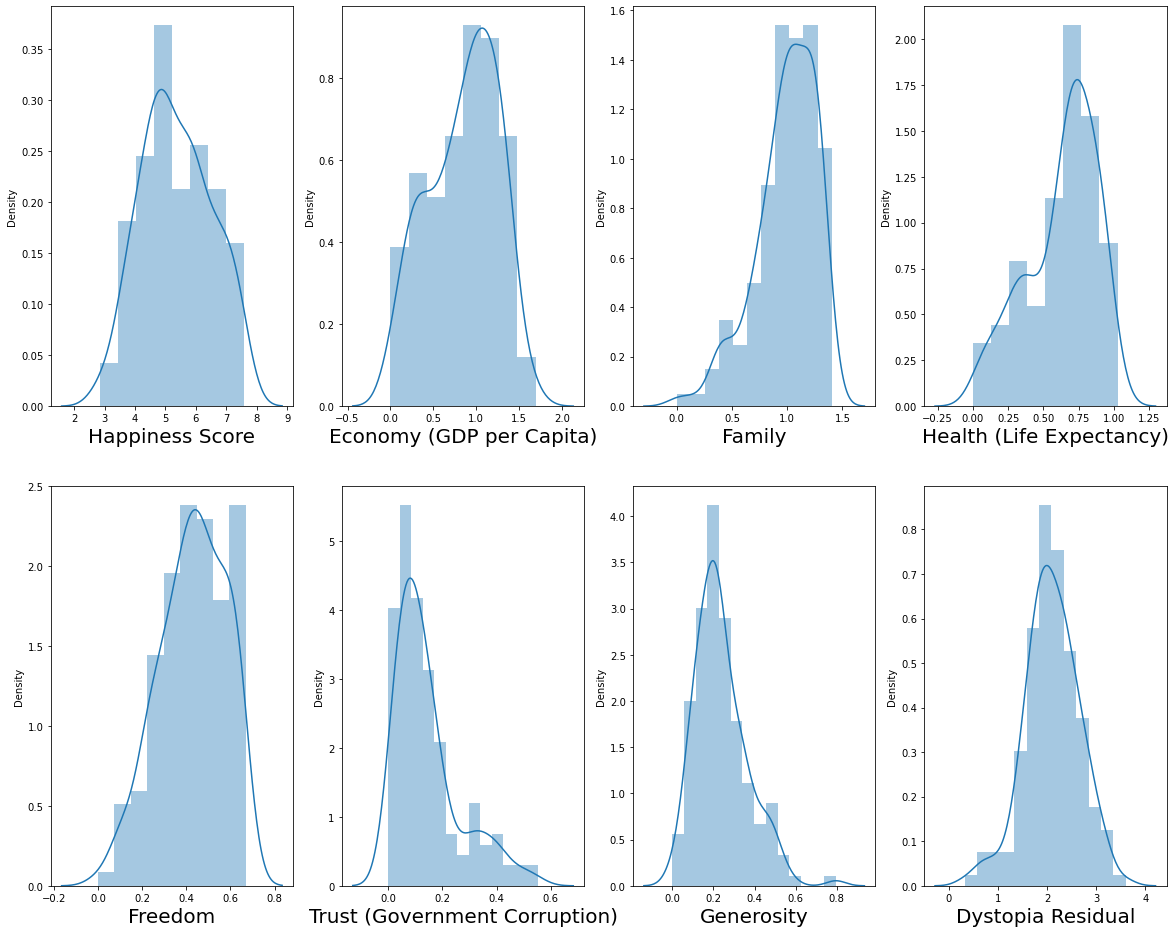

In [112]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax = plt.subplot(3,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel (column, fontsize=20)
        
    plotnumber+=1
plt.show()

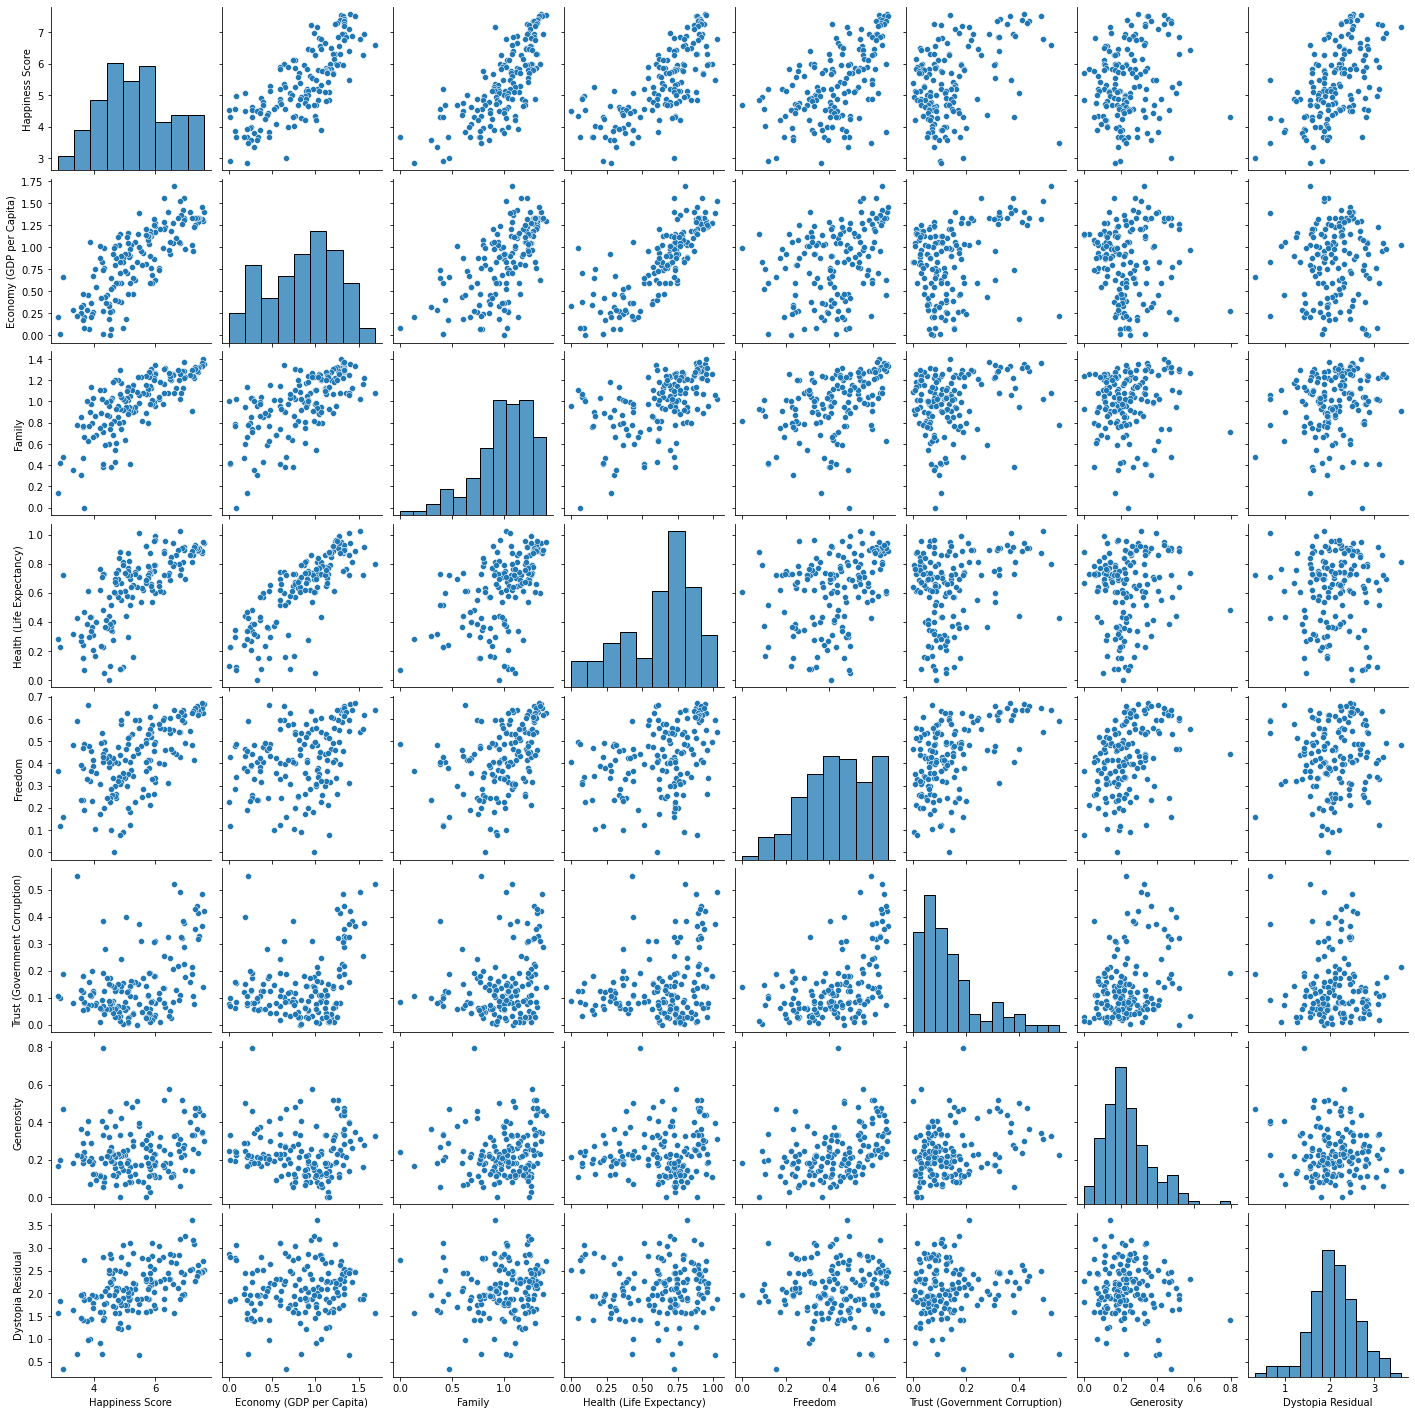

In [113]:
sns.pairplot(df)

In [114]:
df.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

`Only some features fall outside the skew range of -0.5 to 0.5. Thus, the impact of outliers is assumed to be limited`

In [115]:
y = df['Happiness Score']
x = df.drop(columns=['Happiness Score'])

In [118]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method = 'yeo-johnson')
x

array([[ 1.44606101,  1.66920633,  1.4917645 , ...,  1.77399061,
         0.62239051,  0.75099154],
       [ 1.17332111,  2.01213244,  1.53234847, ...,  0.31599326,
         1.48099498,  1.11001108],
       [ 1.23983557,  1.73958573,  1.08522306, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [-0.5134688 , -1.69066357,  0.26293312, ...,  0.73891461,
         1.65933595, -2.86621557],
       [-1.89495386, -1.79680304, -1.52569971, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [-1.52122584, -2.16039658, -1.37181091, ..., -0.06732623,
        -0.49041465, -0.97664547]])

In [133]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.44606101,  1.66920633,  1.4917645 , ...,  1.77399061,
         0.62239051,  0.75099154],
       [ 1.17332111,  2.01213244,  1.53234847, ...,  0.31599326,
         1.48099498,  1.11001108],
       [ 1.23983557,  1.73958573,  1.08522306, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [-0.5134688 , -1.69066357,  0.26293312, ...,  0.73891461,
         1.65933595, -2.86621557],
       [-1.89495386, -1.79680304, -1.52569971, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [-1.52122584, -2.16039658, -1.37181091, ..., -0.06732623,
        -0.49041465, -0.97664547]])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

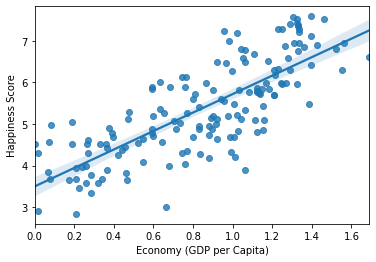

In [127]:
sns.regplot(x= 'Economy (GDP per Capita)',y = 'Happiness Score',data = df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

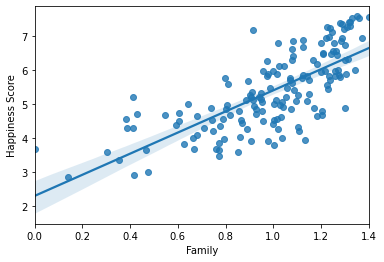

In [128]:
sns.regplot(x= 'Family',y = 'Happiness Score',data = df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

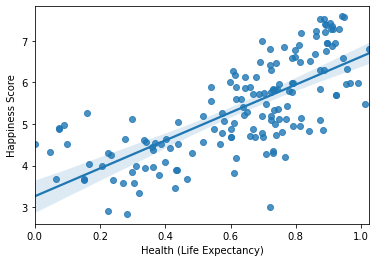

In [129]:
sns.regplot(x= 'Health (Life Expectancy)',y = 'Happiness Score',data = df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

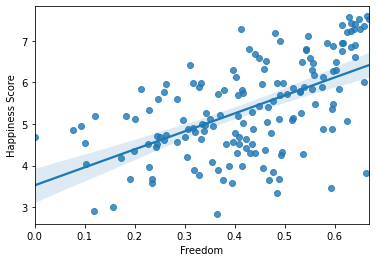

In [130]:
sns.regplot(x= 'Freedom',y = 'Happiness Score',data = df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

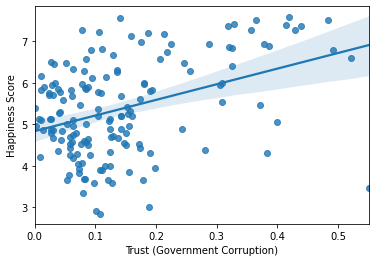

In [131]:
sns.regplot(x= 'Trust (Government Corruption)',y = 'Happiness Score',data = df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

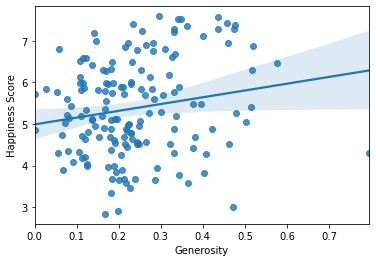

In [132]:
sns.regplot(x= 'Generosity',y = 'Happiness Score',data = df)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

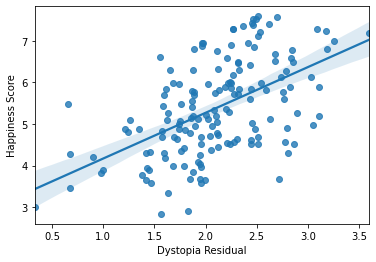

In [136]:
sns.regplot(x= 'Dystopia Residual',y = 'Happiness Score',data = df)

In [148]:
lr = LinearRegression()

max_score = 0
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size=0.25)
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    r2_scr = r2_score(y_test,pred_test)
    if r2_scr > max_score:
        max_score = r2_scr
        final_r2_state = i
print("Maximum R2 score for", final_r2_state, "=", max_score)

Maximum R2 score for 189 = 0.9963213326547086


In [147]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([0.84267866, 0.82432667, 0.75317269, 0.76402857, 0.70269058])

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 189,test_size=.25)
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
pred_test
print("RMSE :", np.sqrt(mean_squared_error(y_test,pred_test)))

print("r2_score :",r2_score(y_test,pred_test))

RMSE : 0.06841446917662962
r2_score : 0.9963213326547086


In [153]:
def models(model, x_train, x_test, y_train, y_test,score):
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train,y_train)*100)
    print('\nModel Report')
    print('Score: %0.2f' %(model.score(x_train,y_train)))

In [154]:
model_name,score=[],[]

In [155]:
#Linear Regression
lr=LinearRegression()
models(lr,x_train,x_test,y_train,y_test,score)
model_name.append('Linear Regression')


#K-Neighbors Regressor
knn=KNeighborsRegressor()
models(knn,x_train,x_test,y_train,y_test,score)
model_name.append('K-Neighbors Regressor')

#Support Vector Regression
svr=SVR()
models(svr,x_train, x_test, y_train, y_test,score)
model_name.append('Support Vector Regression')

#Random Forest Regressor
rnd_fr = RandomForestRegressor()  
models(rnd_fr,x_train, x_test, y_train, y_test,score)
model_name.append('Random Forest Regressor')


Model Report
Score: 0.99

Model Report
Score: 0.94

Model Report
Score: 0.99

Model Report
Score: 0.98


In [158]:
parameters={'n_estimators':[200,300,400],'max_depth':[5,6]}
best=GridSearchCV(RandomForestRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 6, 'n_estimators': 200}

In [159]:
rf=RandomForestRegressor(n_estimators=200,max_depth=6)
models(rf,x_train, x_test, y_train, y_test,score)
model_name.append('Random Forest Regression')


Model Report
Score: 0.98


In [160]:
final_model=pd.DataFrame({'Model Name':model_name,'Score':score})
final_model

,Model Name,Score
0,Linear Regression,99.058895
1,K-Neighbors Regressor,94.264939
2,Support Vector Regression,98.628313
3,Random Forest Regressor,98.488354
4,Random Forest Regression,98.125434
5,Random Forest Regression,98.181719


### It appears that linear regression is giving the highest score

In [161]:
import joblib
joblib.dump(lr,'happiness_score_prediction.pkl')

['happiness_score_prediction.pkl']

In [164]:
import numpy as np
report = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_com = pd.DataFrame({"Original":report,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,5.548,5.458876
1,7.284,7.305322
2,7.378,7.355259
3,5.286,5.215151
4,3.781,3.766316
5,7.406,7.417391
6,4.419,4.325356
7,4.571,4.571465
8,5.123,5.059013
9,4.033,4.059403
